# 파이썬으로 배우는 기계학습
# Machine Learning with Python
**************

# 제 3-3 강: 활성화 함수$^{Activation \ Function}$

## 학습 목표

  - 활성화 함수의 역할을 이해한다
  - 다양한 활성화 함수를 익힌다
    
## 학습 내용
  - 시그모이드$^{Sigmoid}$ 함수
  - 계단 함수$^{Step Function}$
  - 쌍곡탄젠트$^{tanh}$ 활성화 함수
  - 렐루 함수$^{ReLU Function}$


## 1. 체온 변환기

아직도 별로 인상적이지 않은 예제 하나를 들어, 활성화 함수를 살표보도록 하겠습니다.  체온계에 나타난 섭씨(C)$^{Celcius}$를 화씨(F)$^{Fahrenheit}$로 변환하는 일을 하는 체온 변환기를 뉴론으로 만들어 보는 것입니다. 또 하나의 조건은 이 체온 변환기는 섭씨 0도 즉 화씨 32도 이상일 때만 정상적으로 작동한다고 가정합니다. 섭씨를 화씨로 변환하는 수식은 다음과 같습니다. 
\begin{align}
F = \frac{9}{5}C+ 32 \tag{1} 
\end{align}

이 변환식(1)은 일차함수 즉 $y = ax + b$와 같은 형식이며, 여기서 $b$ 즉 32는 절편 혹은 바이어스$^{bias}$라고 합니다. 우리가 흔히 사용하는 이러한 공식을 기계학습에서 많이 사용하고 확장 가능하도록 가중치와 첨자를 사용하는 식으로 바꾸어 보면 다음과 같습니다. 

\begin{align} 
z &= w_0x_0 + w_1x_1 \\
\end{align}

여기서 $x_0 = 1, w_0 = b$로 설정하면 식(1)은 식(2)의 첫번째 수식과 같이 나타낼 수 있습니다.  

\begin{align} 
z &= b + w_1x_1 \\ 
y &= h(z) \tag{2} \\
\end{align}

다만, 식(2)의 두번째 수식, 즉 추가로 설정한 함수 $h(z)$는 __활성화 함수__$^{activation \ function}$입니다. 체온계가 섭씨 0도 이상일 때만 활성화되도록 만들어야 하므로, 변환 작업 후에 결과로 얻어진 $z$을 또 다른 함수 $h(z)$에 적용하여 뉴론을 활성화할지 비활성화해야 할지 결정을 해야 합니다. 이 때 활성화 혹은 비활성화를 결정하는 값을 임계값$^{threshold}$라고 합니다. 체온 변환기 예제에서 임계값은 섭씨 0도 즉 화씨 32도 입니다. 임계값을 적용하는 역할을 하는 함수가 활성화 함수입니다. 즉, 활성화 함수는 임계값을 적용하여 결과값을 출력하는 역할을 합니다.

이러한 조건들을 일반화하여 뉴론으로 표시하면 다음과 같습니다. 체온 변환기에서는 $x_1, w_1, b$를 제외한 모든 다른 입력값은 해당 사항이 없는 경우입니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/simple_node_activate.png?raw=true" width="400">
<center>그림 1: 화씨를 섭씨로 변환하는 함수(뉴론)</center>

일차함수와 같은 체온 변환기 식(1)의 형식을 뉴론을 표현하는 식(2)로 변환하면 다음과 같습니다.

\begin{align} 
z &= 32 + \frac{9}{5}x_1 \\
y &= h(z) \ \ \
  \begin{cases}
   32 & \text{if $z < 32) $}.\\
   z & \text{if $z \geq 32) $}. \ \tag{3} \\
  \end{cases} 
\end{align}

입력($x$)과 가중치($w$)의 곱에 바이어스($b$)를 더한 총합은 $z$이며, $z$는 활성화 함수($h(z)$)의 입력입니다. <span style="color:green">이 경우 활성화 함수는 입력 $z$이 32보다 작을 경우 32을 결과 값으로 출력하고, 그렇지 않을 경우 $z$을 그대로 결과 값으로 출력합니다. 이 활성화 함수의 최종 출력값은 $y$이 됩니다. </span> 기계학습의 학습과정에서는 때때로 이를 $\hat y$이라고 표기하며, y 햇$^{hat}$이라고 읽습니다. 이는 인공 뉴론으로 입력된 모든 정보를 연산하여 출력하는 값 즉 뉴론이 예측하는 값을 나타냅니다. 그러나, 여기에서는 간단한 변환을 나타내므로 간단히 $y$로 표기합니다.  

-----------

__JoyQuiz__: 위식 식(3) 의 활성화 함수를 사용해서 섭씨를 화씨로 계산한다고 합시다. $x_1 = - 10$ 의 경우, 활성화 함수는 어떤 값을 반환하나요?

__JoyAnswer__: 32

__JoyQuiz__: $x_1 = 10$ 의 경우, 활성화 함수는 어떤 값을 반환하나요?

__JoyAnswer__: 50

-----------

이번 강의에서는 체온 변환기를 `C2F`로 이름하는 뉴론을 파이썬으로 구현해 봅시다. 다음 코드에서 `activate()`가 활성화 함수입니다.  

In [ ]:
# function example 2
def C2F(C):
    """ converts Celcius temperature into Fahrenheit"""
    F = 9/5.0 * C + 32
    return activate(F)

def activate(F):
    """returns 32 if F < 32"""
    if F < 32 :
        F = 32
    return F

`C2F()` 함수가 섭씨 온도 값을 받아, 화씨로 변환한 후, 바로 그 값을 반환하지 않고, 그 값으로 `activate()` 함수를 호출합니다. `activate()` 함수는 활성화 함수를 적용하여 결과값을 반환합니다. 이러한 함수 호출을 "활성화 함수를 적용한다"고 말하기도 합니다.  다음과 같은 코드로 인공 뉴론 체온변환기를 테스트할 수 있습니다. 

In [ ]:
# set myTempC = 36.5, 
# invoke the function C2F(celcius) and save the result in myTempF
# print the result
myTempC = 36.5
myTempF = C2F(myTempC)
print(myTempC, ' Celcius is ', myTempF, 'Fahrenheit ')

# test it using list comprehension
test_c = [-20, -10, 0, 36.5, 40, 50]
test_f = [ C2F(c) for c in test_c ] 
print(test_f)

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np
%matplotlib inline

# Plotting the simple neuron 
x = np.linspace(-20, 50)          # (start, end, npoints) or np.arange(0, 10, .1)
y = [C2F(ix) for ix in x]             # list comprehension 

plt.figure()  
plt.plot(x, y)
plt.axis([-20, 50, 0, 150])
plt.xlabel('Celcius')
plt.ylabel('Fahrenheit')
plt.show()

## 2. 활성화 함수$^{Activation \ Function}$

식(3)과 같은 활성화 함수는 임계값을 경계로 출력이 바뀌게 됩니다.  이렇게 뉴론의 입력값들은 활성화 함수들을 통하여 다음 단계로 연결되어 뉴론의 출력의 강약을 조절하는 기능이 내포되어 있습니다.  기계학습에서 자주 사용하는 활성화 함수들 중에 대표적인 몇가지를 살펴보겠습니다. 

### 2.1 시그모이드$^{Sigmoid}$ 함수

다음은 기계학습에서 가장 많이 사용해왔던 활성화 함수인 시그모이드 함수$^{sigmoid \ function}$를 나타내는 식입니다. 

\begin{align} 
  sigmoid(x) = \sigma(x) = \frac{1}{1 + e^{-x}} \tag{4} \\
\end{align}

식(4)에서 $e$는 자연상수로 2.7182...의 값을 갖는 실수입니다.  시그모이드 함수는 복잡한듯 보이지만 사실 상 단순한 함수입니다.  함수는 입력이 주어지면 일정한 방법에 의해 출력을 내주는 것뿐입니다. 예를 들어 시그모이드 함수에 $0$ 입력하면, 즉 $\sigma(0)$를 하면, 식(4)에서 $x$대신 0를 대입하여 계산 결과 즉 $0.5$를 출력합니다.  $x=0, x=1$경우도 쉽게 계산할 수 있습니다. 
\begin{align} 
  \sigma(0) &= \frac{1}{1 + e^{0}} \\
                &= \frac{1}{2} \ \tag{5} \\
  \sigma(1) &= \frac{1}{1 + e^{-1}} \\
                &= \frac{1}{1 + 0.3679...} \\
                &= 0.731... \\
  \sigma(2) &= \frac{1}{1 + e^{-2}} \\
                &= \frac{1}{1 + 0.1353...} \\
                &= 0.880...
\end{align}


시그모이드 함수는 파이썬으로 다음과 같이 작성할 수 있습니다.  

In [2]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

자 그러면 이제 시그모이드 함수의 그래프를 그려볼까요? $x$축의 범위를 `-5.0`와 `5.0`사이로 잡고 그에 상응하는 시그모이드 함수 값을 $y$값을 구하여 그래프를 그린 것입니다. 

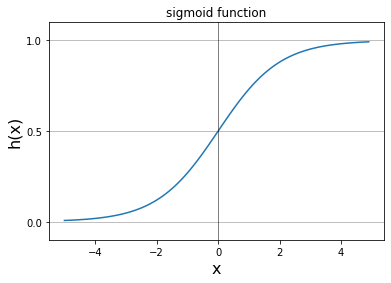

In [3]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('x', fontsize = 16)
plt.ylabel('h(x)', fontsize = 16)
plt.ylim(-0.1, 1.1)
plt.yticks([0.0, 0.5, 1.0])
plt.grid(axis='y')
plt.title('sigmoid function')
plt.show()

아래의 코드는 가중치`(0.5, 1.0, 2.0)`에 따른 함수의 변화를 살펴본 것입니다.  가중치가 클수록 경사도가 높은 것을 관찰할 수 있습니다.  가중치가 클수록 계단 함수와 비슷해지며, 낮을 수록 완만한 $S$ 곡선을 그리게 됩니다. 

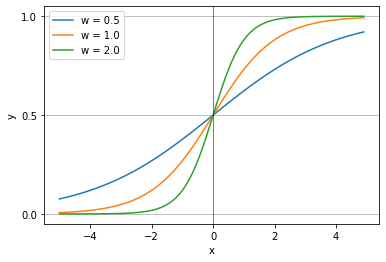

In [4]:
x = np.arange(-5, 5, .1)
for w, l in [(0.5, 'w = 0.5'), (1.0, 'w = 1.0'), (2.0, 'w = 2.0')]:
    y = sigmoid(x * w)
    plt.plot(x, y, label=l)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.axvline(0, color='black', linewidth=0.5)
plt.yticks([0.0, 0.5, 1.0])
plt.grid(axis='y')
plt.show()

시그모이드 함수는 그래프에서 관찰할 수 있듯이 S자와 유사한 완만한 시그모이드 커브 형태를 보이는 함수입니다. 이 함수는 모든 실수 입력 값을 0보다 크고 1보다 작은 미분 가능한 수로 변환하는 특징을 갖습니다. 따라서, 우리가 나중에 공부하게 될 로지스틱 분류$^{logistic \ classification}$ 문제의 가설과 비용 함수$^{cost \ function}$에 많이 사용됩니다.  또한 함수의 반환 값이 항상 `0`와 `1`사이에 있기 때문에 그 결과를 확률로 해석할 때 유용합니다.  이 함수는 미분 결과가 간결하고 사용하기 쉬우므로 기계학습 초기에 많이 사용되었습니다.  기계학습이나 딥러닝에서 노드가 임계값을 넘을 때만 출력하도록 하는 활성화 함수로 사용하기도 합니다.  

-------

## 함수 자체를 인자로 넘겨주기

활성화 함수 자체를 마치 변수처럼 또 다른 함수의 인자로 전달해줄 수 있습니다. 이렇게 할 수 있는 객체를 일급 객체라고 부릅니다. 일급 객체를 삭제할 수도 있으며, 함수의 반환값으로도 자유롭게 사용할 수 있습니다. 

In [ ]:
def C2F(C, activation=activate):
    """ converts Celcius temperature into Fahrenheit"""
    F = 9/5.0 * C + 32
    return activation(F)

__JoyQuiz__: 앞에서 정의했던 `C2F` 함수에 활성화함수를 지정하는 매개변수를 추가하겠습니다. 매개변수 `activation` 을 지정하지 않으면 앞에서 정의했던 `C2F` 와 동일한 기능을 하게 됩니다. `C2F` 함수의 활성화 함수로 시그모이드 함수를 사용해봅시다. 

`C2F` 함수의 매개변수 `C` 에 0을 넣으면 어떤 값을 반환하나요? (소수점 둘째자리로 반올림하세요)

__JoyAnswer__: 1.00

__JoyQuiz__: `C2F` 함수의 매개변수 `C` 에 -15을 넣으면 어떤 값을 반환하나요? (소수점 둘째자리로 반올림하세요)

__JoyAnswer__: 0.99

__JoyQuiz__: `C2F` 함수의 매개변수 `C` 에 -20을 넣으면 어떤 값을 반환하나요? (소수점 둘째자리로 반올림하세요)

__JoyAnswer__: 0.02

In [ ]:
print(round(C2F(0, sigmoid), 2))

In [ ]:
print(round(C2F(-15, sigmoid), 2))

In [ ]:
print(round(C2F(-20, sigmoid), 2))

-----------

### 시그모이드 함수 미분

시그모이드 함수를 사용할 뿐만 아니라 함수의 미분을 사용해야 하는 경우도 많습니다. 이런 과정의 이해를 돕기 위하여 미분 과정을 미리 정리해 보았습니다.  얼른 보기에는 복잡한 것 같지만, 하나씩 풀어보면 재미있게 미분 문제를 해결할 수 있습니다. 간단한 미분 공식 세 개만 기억하면 할 수 있습니다. 

주요 미분 공식: 

\begin{align}
(e^{x})’ &= e^{x} \\ 
(e^{-x})’ &= -e^{-x} \\ 
\frac{du^n}{dx} & = n u^{n-1}\frac{du}{dx}
\end{align}



\begin{align}
\frac{d}{dx}sigmoid(x) & = \frac{d}{dx}{(1+e^{-x})^{-1}} \\ 
& = (-1)\frac{1}{(1+e^{-x})^{2}}\frac{d}{dx}(1+e^{-x}) \\ 
& = (-1)\frac{1}{(1+e^{-x})^{2}}(0+e^{-x})\frac{d}{dx}(-x) \\ 
& = (-1)\frac{1}{(1+e^{-x})^{2}}e^{-x}(-1)  \\ 
& = \frac{e^{-x}}{(1+e^{-x})^{2}}  \\ 
& = \frac{1+e^{-x}-1}{(1+e^{-x})^{2}}  \\ 
& = \frac{(1+e^{-x})}{(1+e^{-x})^{2}}-\frac{1}{(1+e^{-x})^{2}}  \\ 
& = \frac{1}{1+e^{-x}}-\frac{1}{(1+e^{-x})^{2}}  \\ 
& = \frac{1}{1+e^{-x}}(1-\frac{1}{1+e^{-x}}) \\ 
& = sigmoid(x)(1-sigmoid(x))
\end{align}

시그모이드 함수의 미분 결과(도함수)는 다음과 같습니다. 앞에서 언급한 것처럼 시그모이드의 미분 결과는 매우 간결하다는 것을 확인할 수 있습니다.  
\begin{align}
  \frac{d}{dx}sigmoid(x) = sigmoid(x)(1-sigmoid(x))
\end{align}

다음은 도표는 시그모이드 함수와 시그모이드의 도함수를 함께 나타낸 것입니다.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Calculate plot points
x = np.arange(-6., 6., 0.01)
y = sigmoid(x)
dy = y * (1 - y)

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x, y, label="sigmoid")
ax.plot(x, dy, label="derivative")
ax.legend(loc="center right", frameon=False)

도함수 미분계수를 보면 최대값이 `0.25`이며 양끝으로 갈수록 `0`에 가까워집니다. 그런데 기계학습의 과정에서 이렇게 작아지는 숫자를 계속 곱해야하는 상황이 있어서 문제가 발생합니다. 이러한 문제를 __소멸하는 기울기__$^{vanishing \ gradient}$ 문제라고 말합니다. 이 문제로 인하여 딥러닝에서 시그모이드 함수를 활성화 함수로 사용하는 경향이 줄고 있지만, 기계학습 입문 과정에서 꼭 다루는 함수입니다. 이러한 __소멸하는 기울기__ 에 대한 더 자세한 내용은 14강에서 다루도록 하겠습니다.

### 2.1 계단 함수$^{Step Function}$
입력 신호를 받아 출력 신호를 생산할 때 임계값에 따라 출력 신호를 조정하는 함수를 활성화 함수라고 합니다.  그 중에 가장 간단한 함수는 계단 함수이며, 다음과 같이 단극성과 양극성 계단 함수가 있습니다.  

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/StepFunction.png?raw=true" width="600">
<center>그림 2: 계단 함수와 임계값</center>

계단 함수에서 입력 값이 작을 때 출력은 0이 됩니다. 하지만 입력이 임계값 $\theta$ (쎄타, Theta)에 도달하게 되면 출력은 급등합니다. 이와 같이 동작하는 인공 뉴런은 실제 생물학적 뉴런과 같습니다. 과학자들은 입력이 임계값에 도달하여 뉴런이 신호를 전달하기 시작하는 것을 발사$^{fire}$한다고 말합니다.  단극성 및 양극성 계단함수는 다음과 같은 함수로 나타낼 수 있습니다. 

\begin{align} 
z &= w_1x_1 + w_2x_2 + ...\\
\end{align}

\begin{align} 
  h(z) &= 
  \begin{cases}
   \ 1 & \text{$if \ z \ge \theta$} \\
   \ 0 & \text{$otherwise$} \\ \tag{6-1}
  \end{cases}
\end{align}  
\begin{align} 
  h(z) &= 
  \begin{cases}
  \ 1 & \text{$if \ z \ge \theta$} \\
   -1 & \text{$otherwise$} \\ \tag{6-2}
  \end{cases} 
\end{align}

이를 좀 더 간소하게 표현하기 위해, $w_0x_0$ 항을 도입하여, $w_0 = -\theta, \ x_0 = 1$을 적용하면, 계단 함수가 간소화 됩니다.

\begin{align} 
  z &= w_0x_0 + w_1x_1 + w_2x_2 + ... \\
  y &= h(z) \\
\end{align}

\begin{align} 
  h(z) &= 
  \begin{cases}
   \ 1 & \text{$if \ z \ge 0$} \\
   \ 0 & \text{$otherwise$} \\ \tag{7-1}
  \end{cases}
\end{align}  
\begin{align} 
  h(z) &= 
  \begin{cases}
  \ 1 & \text{$if \ z \ge 0$} \\
   -1 & \text{$otherwise$} \\ \tag{7-2}
  \end{cases} 
\end{align}

입력 신호의 총합 즉  $w_0x_0 + w_1x_1+ w_2 x_2 + ...$의 값이 활성화 함수 $h(z)$를 거쳐 변환되어 출력 값 $y$가 됩니다. 그리고, 식(7-1)과 식 (7-2)에서 입력이 0을 넘으면 1을 반환하고, 그렇지 않으면 0 또는 -1을 반환합니다. 결과적으로 $y$값은 두 값 중에 하나가 됩니다. 이와같이 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 결정하는 중요한 역할을 합니다.  

### 계단 함수 구현
단극성 계단 함수는 입력이 0 이상이면 1을 출력하고, 그 외에는 0을 출력합니다. 다음과 같이 단순하게 구현할 수 있습니다.  양극성 계단 함수도 대동소이함으로 여기서 다루지 않습니다. 

__JoyCoding version 0.1__

In [ ]:
import numpy as np
def step(x):
    if x >= 0:
        return 1
    else: 
        return 0

자, 이제 계단 함수를 시그모이드 함수처럼 테스트를 해보도록 하겠습니다. 

In [ ]:
print('step(3) = ', step(3))

이제 배열을 인자로 사용하여 계단(step)함수를 호출하도록 테스트해보겠습니다. 

In [ ]:
print('step(0) = ', step(0))
z = step(np.array([-1.0, 0, 1.0, 2.0]))
print('step([-1.0, 0, 1.0, 2.0]) = ', z)

문제가 발생했습니다. 

계단(Step) 함수에 스칼라를 적용하면 문제가 없지만, 인공 신경망에서 흔히 사용하는 것처럼 배열을 사용할 때 함수가 제대로 작동하지 않은 것입니다. 그런데, 문제는 우리가 사용하는 인수가 스칼라일 수도 있고 배열일 수도 있습니다. 그런데, 다음과 같이 $x >= 0$ 연산을 실행할 때는 $x$가 스칼라이든 배열이든 문제가 되질 않는다는 것을 알 수 있습니다. 

In [ ]:
x = np.array([-1.0, 0, 1.0, 2.0])
print(x > 0)

다만, 문제는 그 결과가 같은 `ndarray` 자료형이기 때문에, 즉 각 원소마다 `True/False`가 있기 때문에 `if` 에서 `True/False`인지 하나로 판단을 내릴 수 없기 때문입니다.  우리가 원하는 것은 `ndarray`자료형을 그대로 유지하면서, `True/False`대신 `1, 0`로 반환하길 원하는 것입니다.  이것을 어떻게 구현하면 좋을까요? 여러 방법이 있겠지만 두 가지 정도 제시할 수 있습니다. 

첫째 시그모이드 함수를 테스트하면서 이용한 브로드캐스트 방법입니다. 즉  `x >= 0` 비교한 결과 값에 스칼라 `1`을 곱하면 그 결과는 `1, 0`로 구성된 `ndarray` 자료형으로 반환됩니다.  다시 말하면, `x >= 0`의 값이 `[False False True True]` 이고, 이에 `1`을 곱하면 결과는 `[0 0 1 1]`이 됩니다.  암묵적 형식 변환$^{implicit \ type \ conversion}$을 사용한 것입니다. 

__JoyCoding version 0.2__

In [ ]:
import numpy as np
def step(x):
    return (x > 0) * 1

In [ ]:
print('step(0) = ', step(0))
z = step(np.array([-1.0, 0, 1.0, 2.0]))
print('step([-1.0, 0, 1.0, 2.0]) = ', z)

다른 한 방법은 강제적으로 형식$^{type}$을 변환하는 것입니다

__JoyCoding version 0.3__

In [ ]:
import numpy as np
def step(x):
    return np.array(x > 0, dtype=np.int)

In [ ]:
print('step(0) = ', step(0))
z = step(np.array([-1.0, 0, 1.0, 2.0]))
print('step([-1.0, 0, 1.0, 2.0]) = ', z)

자, 그러면 이제 우리가 이렇게 정의한 계단 함수를 그래프로 그려보면 어떨까요?   

In [ ]:
def step(x):
    return (x > 0) * 1

x = np.arange(-3.0, 3.0, 0.2)
y = step(x)
plt.plot(x, y)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('h(x)')
plt.show()

`x = np.arange(-3.0, 3.0, 0.2)` 는 `-3.0`에서 `3.0`직전까지 `0.2`간격으로 `Numpy`배열을 생성하여 `x`에 저장합니다. 즉 `x = [-3.0, -2.8, …, 2.8]` 이 됩니다. 이 `x`값을 인수로 받은 `step()` 함수는 각 배열의 원소마다 `x > 0`을 적용하여 `True` 혹은 `False`값을 구하고, 그 값을 `int`형으로 변화하여 배열을 만들어 `y`에 저장한 값을  그래프로 나타냅니다.

In [ ]:
import numpy as np
x = np.arange(-3.0, 3.0, )
x

--------

**JoyQuiz**

앞에서 그린 계단 함수의 그래프를 살펴 보면, `x = 0` 의 근처에 있는 선에 약간의 기울기가 있는 것을 관찰할 수 있습니다. 어떻게 하면 아래와 같이 거의 직선에 가깝게 고치려고 한다면, 어느 코드를 고쳐야 할까요? 

(1) `step` 함수 <br>
(2) `arange` 함수의 인자<br>
(3) `plt.axvline` 함수의 인자<br>
(4) `plt.ylim` 함수의 인자<br>

__JoyAnswer__:(2)

In [ ]:
x = np.arange(-3.0, 3.0, 0.05)
y = step(x)
plt.plot(x, y)
plt.axvline(0, color='black', linewidth=0.5)
plt.ylim(-0.1, 1.1)
plt.show()

### 2.2 쌍곡탄젠트$^{tanh}$ 활성화 함수

쌍곡탄젠트 함수라고 부르는 $tanh^{hyperbolic \ tangent}$ 함수는 시그모이드 함수 대신 사용할 수 있는 활성화 함수입니다. 이 함수는 시그모이드와 매우 유사합니다.  사실상 시그모이드 함수의 확장형이라 간주하면 됩니다.  두 함수의 차이점은 시그모이드의 출력 범위가 `0`에서 `1` 사이인 반면 $tanh$의 출력 범위는 `-1`에서 `1`사이라는 점입니다.  시그모이드와 비교하여 $tanh$와는 출력 범위가 더 넓고 경사면이 큰 범위가 더 크기 때문에 더 빠르게 수렴하여 학습하는 특성이 있습니다.

시그모이드와 비교하여 중심점이 0이고 기울기 범위가 넓은 차이점는 있지만 시그모이드 함수의 치명적인 단점인 __소멸하는 기울기__$^{vanishing \ gradient}$ 문제를 그대로 갖고 있습니다. 

#### 쌍곡탄젠트 함수 정의
쌍곡탄젠트 함수$^{Hyperbolic Tangent}$ $tanh$ 는 다음과 같이 정의 됩니다.

\begin{align}
tanh(x) & = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} \\ 
\end{align}

\begin{align}
tanh(x) &= \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} \\ 
        &= \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} \frac{e^{-x}}{e^{-x}} \\
        &= \frac{1-e^{-2x}}{1+e^{-2x}} \\
        &= \frac{2-(1+e^{-2x})}{1+e^{-2x}} \\
        &= \frac{2}{1+e^{-2x}} -1  \quad \because \sigma(2x) = \frac{1}{1+e^{-2x}}\\ 
        &= 2sigmoid(2x) -1
\end{align}

쌍곡탄젠트 함수가 시그모이드와 유사한 특징을 갖고 있으며, 시그모이드 함수를 사용하여 나타낼 수 있습니다.

\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}}  \\ 
tanh(x) & = 2sigmoid(2x) -1
\end{align}

#### 쌍곡탄젠트 함수 미분
쌍곡탄젠트 함수를 인공 신경망의 활성화 함수로 사용할 경우, 경사 하강법$^{gradient \ descent}$ 및 역전파 계산 과정에서 함수를 미분하여 사용하게 됩니다. 쌍곡탄젠트 함수의 미분 과정은 다음과 같이 정리할 수 있습니다

주요 미분 공식
\begin{align}
(e^{x})’ &= e^{x} \\ 
(e^{-x})’ &= -e^{-x} \\ 
\big[ \frac{f(x)}{g(x)}\big]’ & = \frac{f’(x)g(x)-f(x)g’(x)}{g^2(x)}
\end{align}


쌍곡탄젠트 함수의 미분 절차는 다음과 같습니다.

\begin{align}
f(x) & = e^{x}-e^{-x} \\ 
g(x) & = e^{x}+e^{-x} \\ 
\frac{d}{dx}tanh(x) & = \big[\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}\big]’ \\ 
 & =  \big[\frac{f(x)}{g(x)}\big]’ \\ 
 & = \frac{f’(x)g(x)-f(x)g’(x)}{g^2(x)} \\ 
 & = \frac{(e^{x}-(-e^{-x}))(e^{x}+e^{-x}) - (e^{x}-e^{-x})(e^{x}-e^{-x} )}{(1+e^{-x})^2} \\ 
 & = \frac{(e^{x}+e^{-x})^2 - (e^{x}-e^{-x})^2}{(e^{x}+e^{-x})^2} \\ 
 & = \frac{(e^{x}+e^{-x})^2}{(e^{x}+e^{-x})^2} - \frac{(e^{x}-e^{-x})^2}{(e^{x}+e^{-x})^2} \\ 
 & = 1 - \big[\frac{(e^{x}-e^{-x})}{(e^{x}+e^{-x})}\big]^2 \\ 
 & = 1 - tanh^2(x) \\ 
 & = (1 - tanh(x))(1 + tanh(x))
\end{align}

다음은 쌍곡탄젠트 함수의 미분결과(도함수)를 그래프를 그린 결과입니다. 

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def tanh(x):
    return 2 / (1 + np.exp(-2*x))-1

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)
plt.plot(x, y)
y = (1-tanh(x))*(1+tanh(x))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.1, 1.1)
plt.show()

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Calculate plot points
x = np.arange(-6., 6., 0.01)
y = tanh(x)
dy = (1-tanh(x))*(1+tanh(x))

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x, y, label="sigmoid")
ax.plot(x, dy, label="derivative")
ax.legend(loc="lower right", frameon=False)

쌍곡탄젠트 미분계수를 보면 최댓값은 1입니다. 시그모이드 미분계수와 비교하여 최대값이 4배가 큰것을 확인할 수 있습니다.  쌍곡탄젠트 함수로 역시 시그모이드 함수처럼 __소멸하는 기울기__ 문제가 발생합니다.  그렇게 되면, 신경망은 더 이상의 학습이 어려워집니다.

이 문제의 해결책은 시그모이드 함수가 입력 값을 1보다 작도록 변형하는 영역에서 그 값을 변형하지 않고, 그대로 유지하도록 하는 것이었습니다.  그렇게 할 수 있는 함수가 렐루$^{ReLU}$ 활성화 함수인데, 이외로 아주 간단한 함수입니다.  ReLU는 2000년에 한루저$^{Hahnloser}$가 발표한 Nature에 발표한 논문(Digital selection and analogue amplification coexist in a cortex-inspired silicon circuit.)에서 처음 소개되었으며, 2018년 현재, 딥러닝에서 가장 많이 사용하는 활성화 함수입니다.  

### 2.3 렐루 함수$^{ReLU Function}$

렐루$^{ReLU}$ 함수는 Rectified Linear Unit의 약자입니다.  렐루 함수는 입력값이 0보다 작으면 0이고 0보다 크면 입력값 그대로를 내보냅니다.  

\begin{align} 
  h(x) &= 
  \begin{cases}
   \ x & \text{$if \ x \ge 0$} \\
   \ 0 & \text{$otherwise$} \\ \tag{8}
  \end{cases}
\end{align}  


렐루 함수를 그래프로 나타내면 다음과 같습니다.  `Numpy`의 `maximum`함수를 이용하였는데, 이 함수는 두 입력 중에서 큰 값을 반환합니다. 

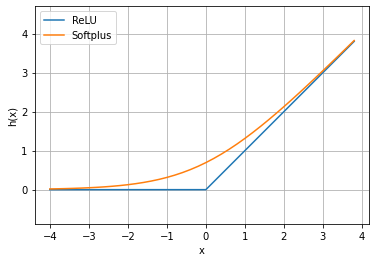

In [1]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-4.0, 4.0, 0.2)
y = relu(x)
plt.plot(x, y, label='ReLU')
y = np.log(1 + np.exp(x))
plt.plot(x, y, label='Softplus')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend(loc=2)
plt.grid(True)
plt.show()

ReLU 함수의 특징은 다음과 같습니다. 
- 0 이하의 입력에 대해 0을 출력함으로 부분적으로 활성화 시킬수 있다. 
- __소멸하는 기울기__$^{vanshing \ gradient}$ 문제가 없습니다. 
- 선형함수이므로 미분 계산이 간단하다.
- 입력의 크기에 무관합니다$^{scale-invariant}$

기계학습에서 많이 사용하던 시그모이드를 렐루가 대체하게 된 이유 중 가장 큰 것이 __소멸하는 기울기__ 문제입니다. 시그모이드 함수는 `0`에서 `1`사이의 값을 가지는데 경사하강법을 사용하여 역전파를 할 때, 은닉층들을 지나면서 기울기$^{gradient}$를 계속 곱하므로 기울기$^{gradient}$는 `0`으로 수렴하게 됩니다. 따라서 은닉층이 많은 딥러닝에서는 잘 작동하지 않게 됩니다.


### 참고 자료

- 스탠포드 대학 앤드루 응 교수의 기계학습 강의 <p>
    - https://www.coursera.org/specializations/deep-learning
    - https://www.coursera.org/learn/machine-learning/home/welcome



## 학습 정리 
- 활성화 함수의 역할 이해 
- 다양한 활성화 함수 이해 
    - 시그모이드 함수, 계단 함수, 쌍곡탄젠트 함수, 렐루 함수


---------------